# Notes/Reminders

<font color = 'red'>

None

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Details 

**Primary:**
- id (Id of track generated by Spotify)

**Numerical:**
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

**Dummy:**
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)

**Categorical:**
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

# Reading Spotify in Datasets 

There are five datasets with information that might be useful.  Reading them in to see what we may be able to use.  Also limiting to 2014 and after where possible to line up with the headline data.

1 - All Songs

2 - All Songs by Artist

3 - All Songs by Genre

4 - All Songs by Year

5 - All Songs with the Genre

In [3]:
top_100_songs = pd.read_csv('Top100.csv')
top_100_songs['key'] = top_100_songs['title']+top_100_songs['year'].astype(str)
top_100_songs = top_100_songs[top_100_songs.year > 2013]
top_100_key = top_100_songs.key
top_100_songs.head()

,Unnamed: 0,title,artist,peakPos,lastPos,weeks,isNew,rank,date,year,key
0,0,Mood,24kGoldn Featuring iann dior,1,1,15,False,1,11/28/2020,2020,Mood2020
1,1,Therefore I Am,Billie Eilish,2,94,2,False,2,11/28/2020,2020,Therefore I Am2020
2,2,Positions,Ariana Grande,1,2,4,False,3,11/28/2020,2020,Positions2020
3,3,I Hope,Gabby Barrett Featuring Charlie Puth,3,3,47,False,4,11/28/2020,2020,I Hope2020
4,4,Laugh Now Cry Later,Drake Featuring Lil Durk,2,4,14,False,5,11/28/2020,2020,Laugh Now Cry Later2020


In [4]:
#Reading in spotify datasets limiting to 2014 and after where year is available
all_songs = pd.read_csv('data.csv')
all_songs = all_songs[all_songs['year'] > 2013]
all_songs['key'] = all_songs['name']+all_songs['year'].astype(str)
all_songs['top_100'] = all_songs.key.isin(top_100_key)
all_songs.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,top_100
18406,0.591,2014,0.0489,['Ariana Grande'],0.525,204093,0.621,0,0lizgQ7Qw35od7CYaoMBZb,0.0,Santa Tell Me2014,0.2940,-7.364,1,Santa Tell Me,86,2014-11-24,0.1160,191.900,True
18407,0.463,2014,0.3010,['J. Cole'],0.692,292987,0.521,1,62vpWI1CHwFy7tMIcSStl8,0.0,No Role Modelz2014,0.0565,-8.465,0,No Role Modelz,84,2014-12-09,0.3300,100.450,True
18408,0.510,2014,0.4310,['Vance Joy'],0.484,204280,0.731,0,3JvrhDOgAt6p7K8mDyZwRd,0.0,Riptide2014,0.1510,-6.694,1,Riptide,78,2014-09-09,0.0379,101.654,True
18409,0.584,2014,0.0751,['J. Cole'],0.517,239320,0.705,1,6Ius4TC0L3cN74HT7ENE6e,0.0,Wet Dreamz2014,0.1280,-8.205,0,Wet Dreamz,79,2014-12-09,0.3640,175.906,True
18410,0.211,2014,0.2200,"['Ty Dolla $ign', 'The Weeknd', 'Wiz Khalifa',...",0.805,242983,0.330,1,7t2bFihaDvhIrd2gn2CWJO,0.0,"Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mus...",0.1050,-8.712,0,"Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mus...",80,2014-06-10,0.1000,121.970,False


In [5]:
artist_songs = pd.read_csv('data_by_artist.csv')
artist_songs.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [6]:
genre_songs = pd.read_csv('data_by_genres.csv')
genre_songs.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [50]:
genre_songs.groupby('genres').size()

genres
21st century classical        1
432hz                         1
8-bit                         1
[]                            1
a cappella                    1
abstract                      1
abstract beats                1
abstract hip hop              1
accordeon                     1
accordion                     1
acid house                    1
acid rock                     1
acid trance                   1
acousmatic                    1
acoustic blues                1
acoustic pop                  1
acoustic punk                 1
acoustic rock                 1
action rock                   1
adoracion                     1
adult standards               1
adventista                    1
afghan pop                    1
afghan traditional            1
african percussion            1
african reggae                1
african rock                  1
african-american classical    1
afro dancehall                1
afro house                    1
                             ..
w

In [7]:
yearly_songs = pd.read_csv('data_by_year.csv')
yearly_songs = yearly_songs[yearly_songs.year > 2013]
yearly_songs.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
93,1,2014,0.249313,0.589948,233728.314713,0.648795,0.076570,0.191822,-7.067440,0.084061,122.305263,0.463049,55.543142,0
94,1,2015,0.253952,0.593774,230029.046606,0.627064,0.106787,0.188856,-7.625639,0.096779,120.115411,0.432098,56.700608,7
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1


In [8]:
songs_and_genre = pd.read_csv('data_w_genres.csv')
songs_and_genre.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


# Descriptive Statistics

In [ ]:
#Checking each dataframe for null values and printing descriptive statistics
print(all_songs.isna().sum())
all_songs.describe()

In [31]:
all_songs[all_songs['popularity']>=69].describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo
count,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000
mean,0.473454,2018.257462,0.255294,0.664993,203231.753439,0.612346,0.413185,0.025658,0.175399,-6.744038,0.593304,74.492863,0.116558,121.279041
std,0.226407,1.717193,0.261291,0.151925,46421.185487,0.182644,0.492469,0.130344,0.136232,3.344613,0.491281,4.978173,0.113299,30.808471
min,0.000000,2014.000000,0.000000,0.000000,57074.000000,0.000020,0.000000,0.000000,0.000000,-40.449000,0.000000,69.000000,0.000000,0.000000
25%,0.298000,2017.000000,0.042100,0.573000,176547.000000,0.500000,0.000000,0.000000,0.096200,-7.833000,0.000000,71.000000,0.041700,97.054000
50%,0.463000,2019.000000,0.162000,0.682000,201000.000000,0.630000,0.000000,0.000000,0.120000,-6.146000,1.000000,73.000000,0.067600,120.001000
75%,0.641000,2020.000000,0.398000,0.772000,226160.000000,0.744000,1.000000,0.000038,0.206000,-4.799000,1.000000,77.000000,0.149000,142.689000
max,0.980000,2020.000000,0.994000,0.980000,632625.000000,1.000000,1.000000,1.000000,0.953000,0.457000,1.000000,100.000000,0.894000,220.099000


About 28% of songs had a popularity rating at or above the 75th percentile

In [28]:
all_songs[all_songs['top_100']==True].describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo
count,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000
mean,0.456771,2017.234199,0.204171,0.666317,209491.505643,0.632406,0.441874,0.014301,0.174317,-6.374718,0.608916,67.289503,0.126759,122.004621
std,0.215116,2.026895,0.234344,0.141975,43715.781480,0.171452,0.496750,0.094947,0.129097,2.311021,0.488131,12.228220,0.122596,29.522408
min,0.034900,2014.000000,0.000030,0.144000,74866.000000,0.028400,0.000000,0.000000,0.013400,-25.716000,0.000000,0.000000,0.023200,48.718000
25%,0.287000,2015.000000,0.031275,0.568000,182605.250000,0.521000,0.000000,0.000000,0.097600,-7.477250,0.000000,61.000000,0.042300,97.923250
50%,0.447000,2017.000000,0.106500,0.671000,206317.000000,0.643500,0.000000,0.000000,0.122000,-6.048500,1.000000,68.000000,0.069050,120.094000
75%,0.613000,2019.000000,0.304000,0.769000,230979.750000,0.765250,1.000000,0.000010,0.207000,-4.871500,1.000000,75.000000,0.174000,143.861750
max,0.970000,2020.000000,0.996000,0.978000,620101.000000,0.989000,1.000000,0.970000,0.882000,-0.804000,1.000000,100.000000,0.741000,215.669000


About 13% of songs are in the Billboard Top 100

In [10]:
print(artist_songs.isna().sum())
artist_songs.describe()

mode                0
count               0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64


,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.000000,28680.000000,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.759170,13.847211,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901
std,0.427595,53.372544,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552
min,0.000000,1.000000,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110363,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000
50%,1.000000,3.000000,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000
75%,1.000000,8.000000,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000
max,1.000000,3169.000000,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000


In [11]:
print(yearly_songs.isna().sum())
yearly_songs.describe()

mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1.0,2017.000000,0.262771,0.628194,213860.537310,0.612289,0.074666,0.183005,-7.507544,0.112185,120.673875,0.450135,61.144179,1.571429
std,0.0,2.160247,0.023668,0.039574,15012.805836,0.023189,0.030920,0.007785,0.599392,0.019360,2.376442,0.027819,3.859279,2.439750
min,1.0,2014.000000,0.219931,0.589948,193728.397537,0.590421,0.016376,0.172616,-8.312630,0.084061,117.202740,0.416476,55.543142,0.000000
25%,1.0,2015.500000,0.251632,0.596988,203512.897615,0.593040,0.065393,0.177430,-7.891624,0.100546,119.384021,0.431815,58.173899,0.500000
50%,1.0,2017.000000,0.267633,0.612217,211115.696787,0.602435,0.077640,0.181170,-7.625639,0.110536,120.235644,0.447921,63.263554,1.000000
75%,1.0,2018.500000,0.281235,0.654157,225712.778450,0.629148,0.095537,0.190285,-7.118112,0.124109,122.113785,0.460933,63.799107,1.000000
max,1.0,2020.000000,0.286099,0.692904,233728.314713,0.648795,0.106787,0.191822,-6.595067,0.141384,124.283129,0.501048,65.256542,7.000000


In [12]:
print(genre_songs.isna().sum())
genre_songs.describe()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64


,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [13]:
print(songs_and_genre.isna().sum())
songs_and_genre.describe()

genres              0
artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901,0.759170,13.847211
std,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552,0.427595,53.372544
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110363,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000,1.000000,2.000000
50%,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000,1.000000,3.000000
75%,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000,1.000000,8.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,1.000000,3169.000000


# Plotting Variables

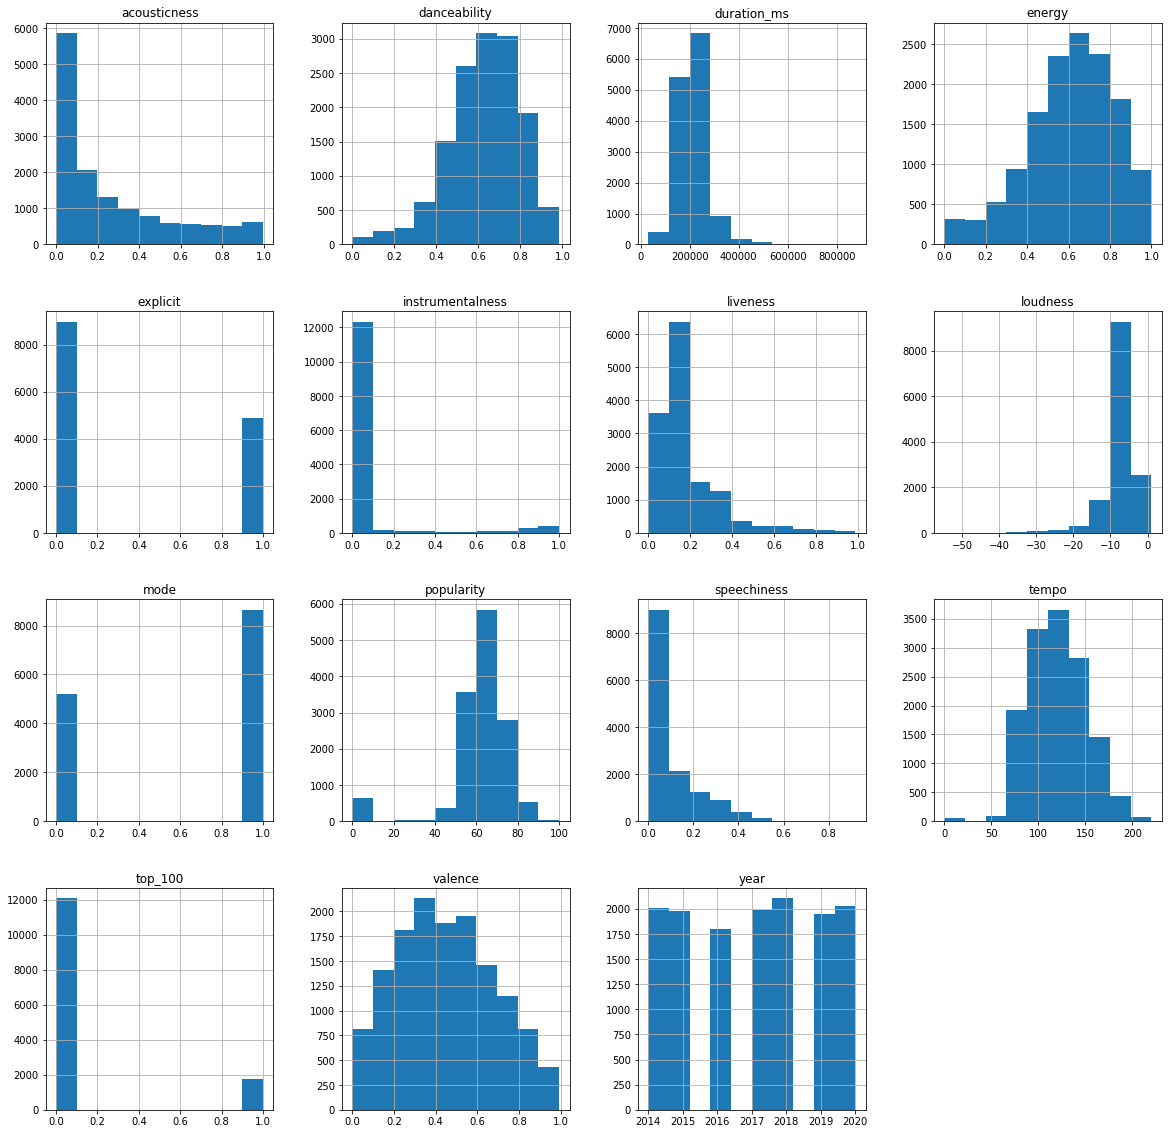

In [14]:
all_songs.hist(figsize=(20,20))
plt.show()

<font color = 'Blue'>
        
**Skewed Left**  

<br/>

<font color = 'Black'>
    
***Instrumentalness***, and to a lesser extent, ***Duration***, are almost completely distributed around the minimum value.

***Acousticness, Liveliness, and Speechiness*** have longtail distributions.

<br/>

<font color = 'Blue'>

**Skewed Right**  

<br/>

<font color = 'Black'>

***Loudness*** is skewed toward the right.

<font color = 'Blue'>

<br/>

**Normal Distribution**

<br/>

<font color = 'Black'>


***Danceability, Energy, Tempo*** and ***Valence*** are pretty normally distributed; Popularity is somewhat normally distributed.

<font color = 'Blue'>
    
<br/>    

**Indicators**

<br/>

<font color = 'Black'>

***Explicitness***, and ***Mode*** are Indicators with binary values

<br/>

<font color = 'Blue'>


**Other**

<br/>
<font color = 'Black'>

There is no clear distribution for ***Key***.

Songs to be roughly equally represented across all ***Years*** in the dataset.

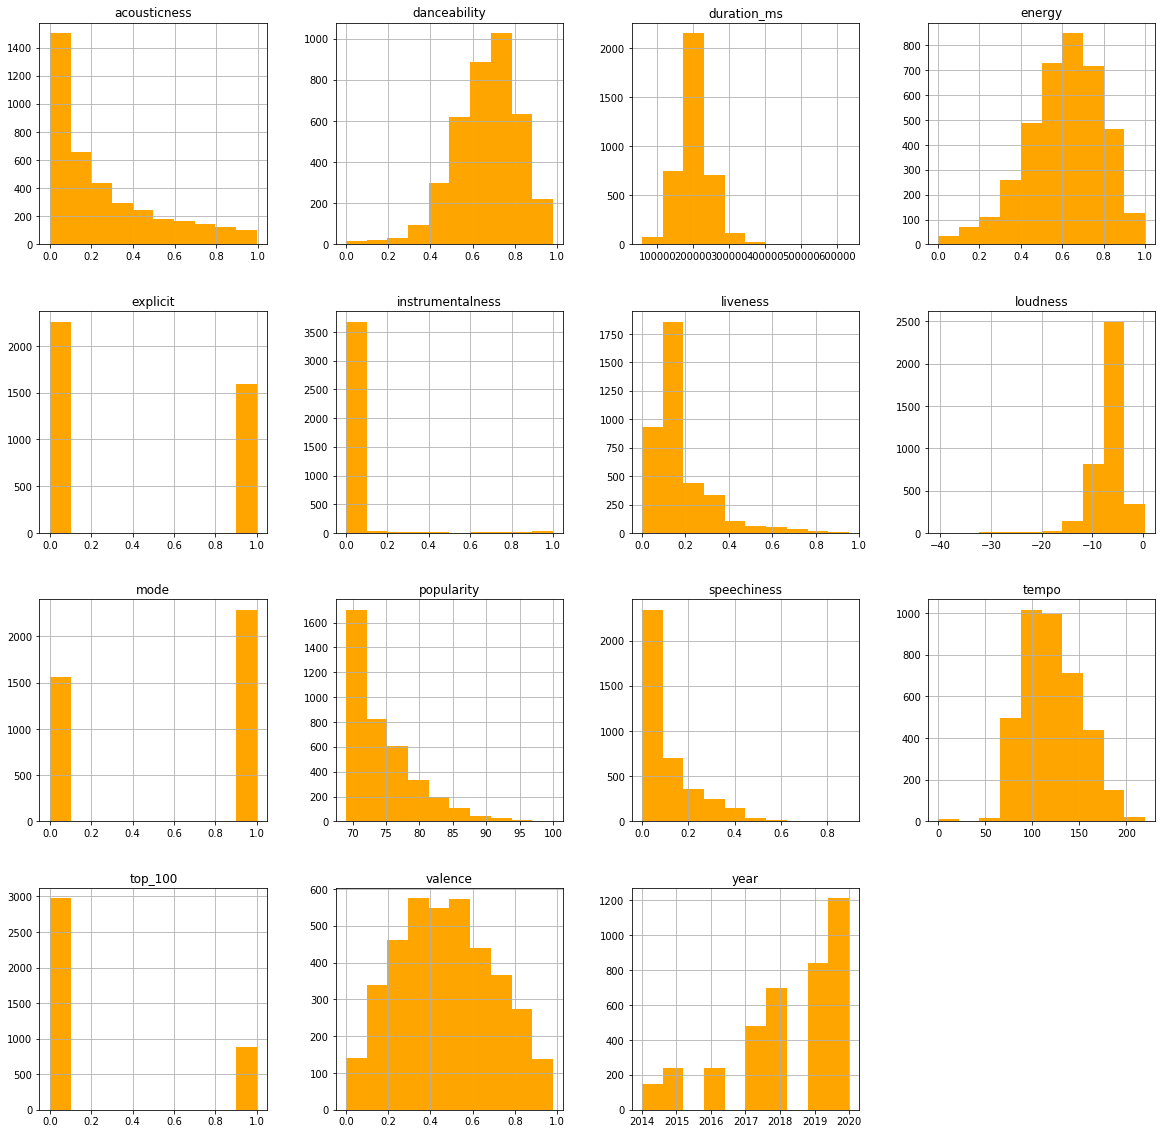

In [32]:
all_songs[all_songs['popularity']>=69].hist(figsize=(20,20), color = 'orange')
plt.show()

Popular songs were similar in distribution to all songs for most variables, the most notable differences being their duration and the year they were released.

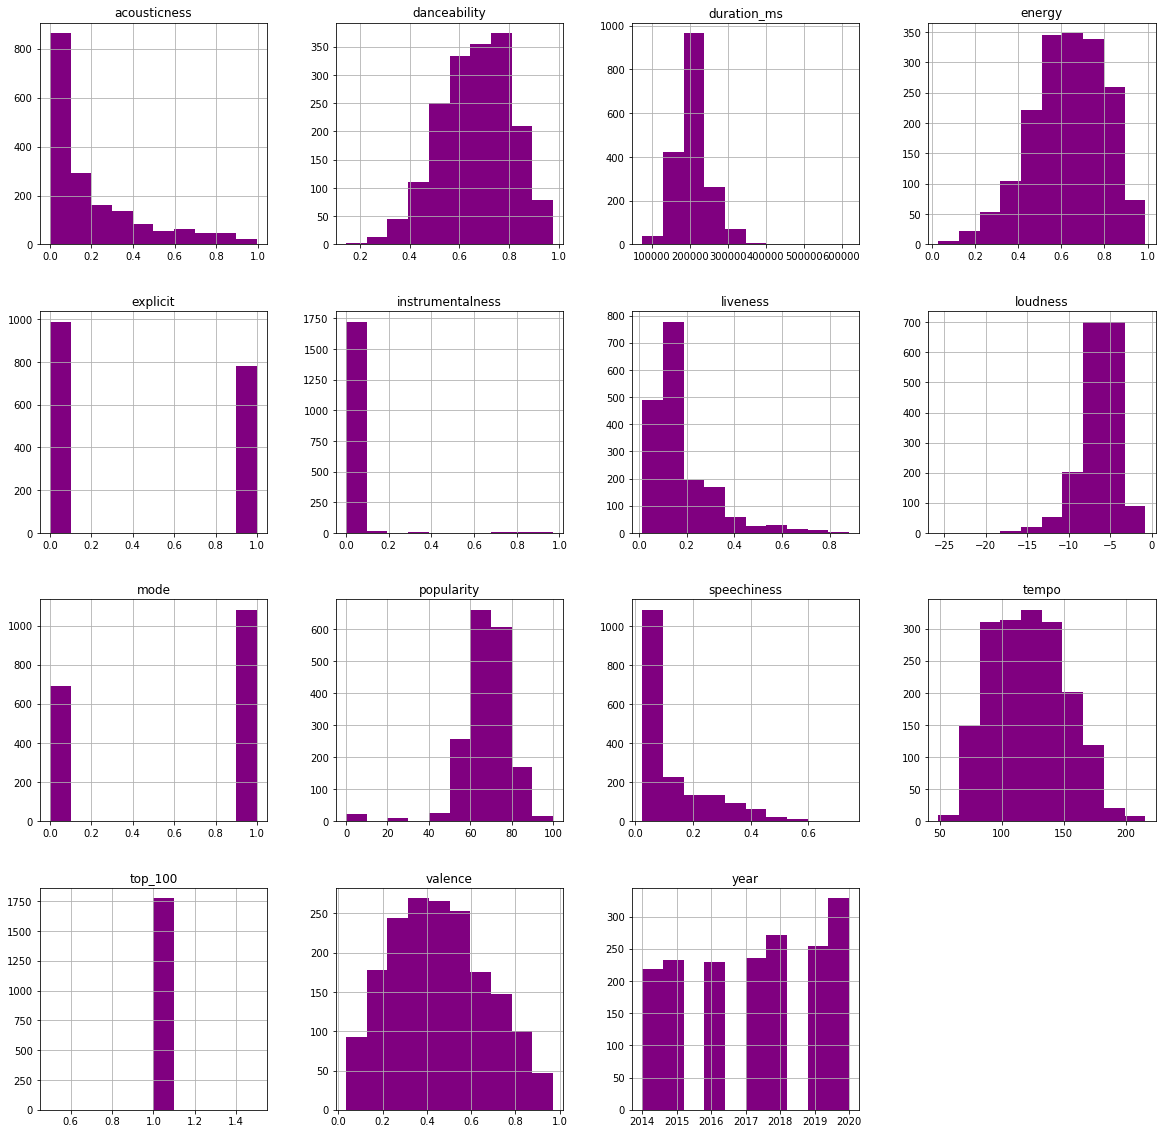

In [27]:
all_songs[all_songs['top_100'] == True].hist(figsize=(20,20), color = 'purple')
plt.show()

Songs in the Top 100 were louder and more energetic than all songs in the dataset

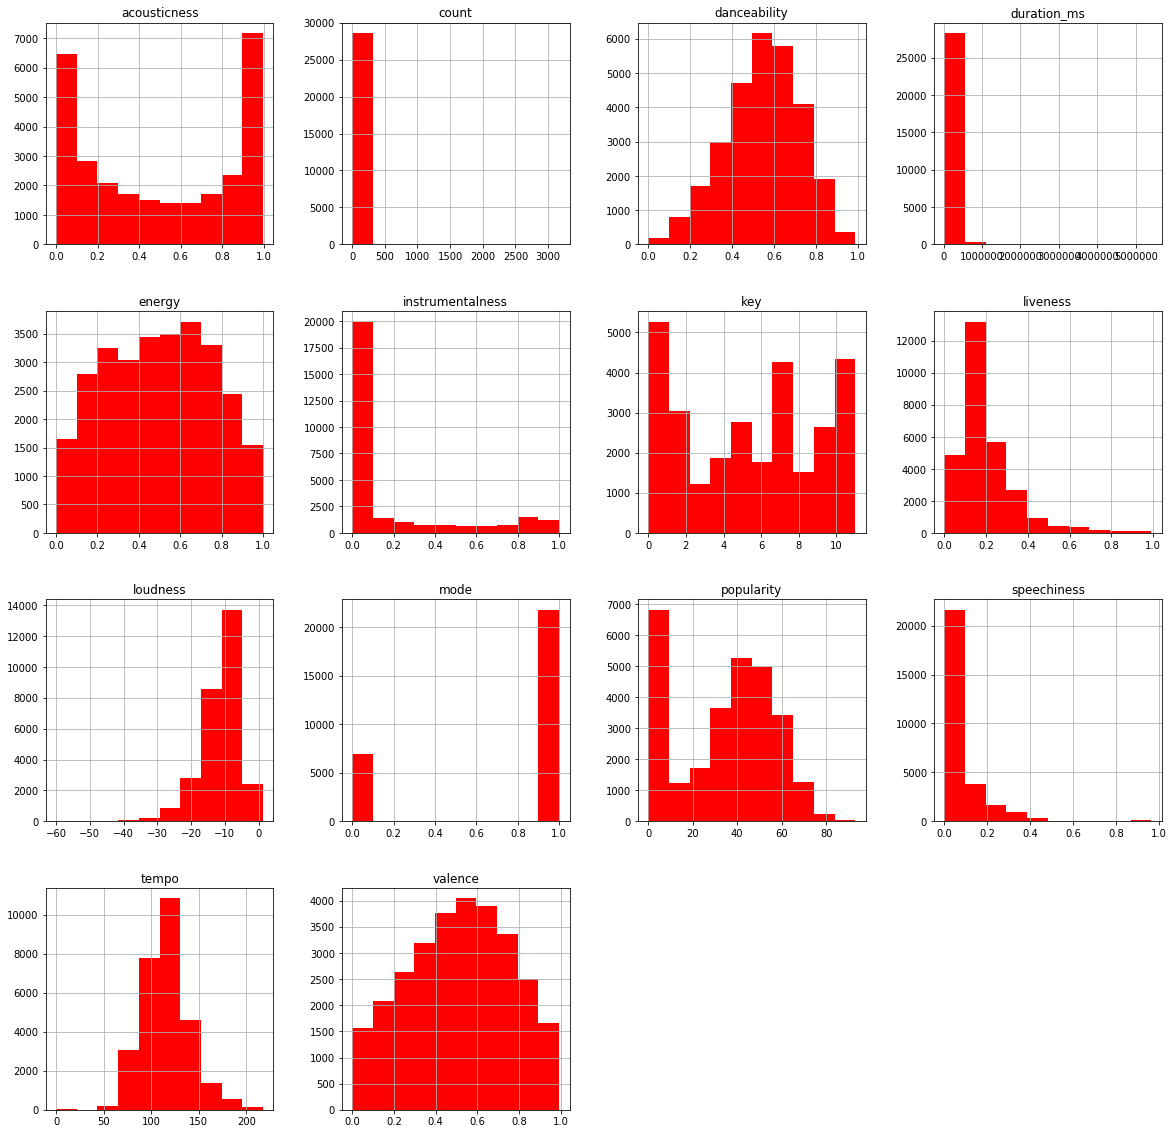

In [15]:
songs_and_genre.hist(figsize = (20,20), color = 'red')
plt.show()

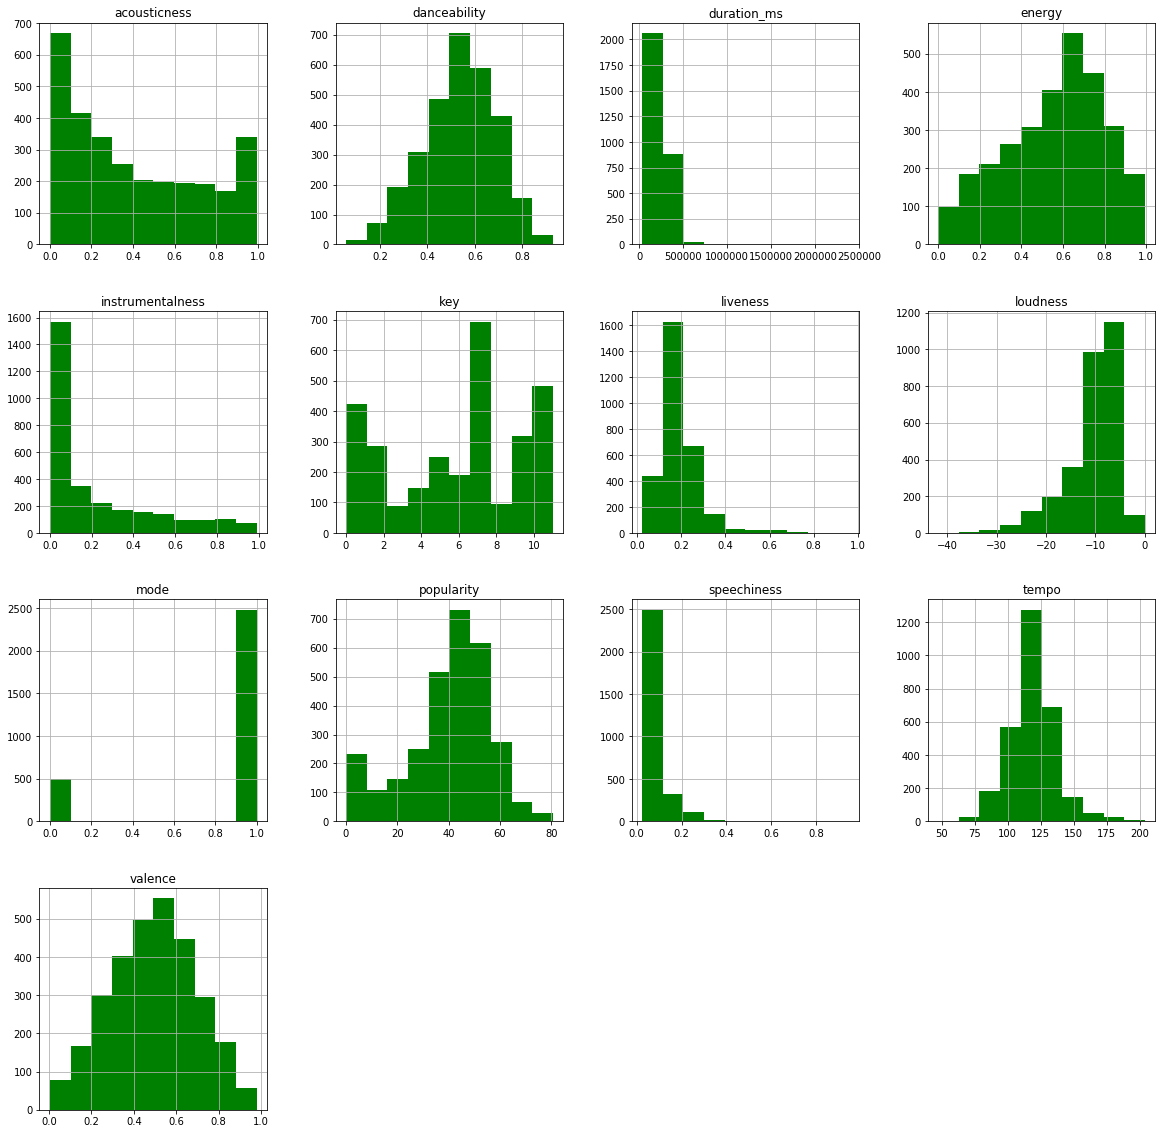

In [16]:
genre_songs.hist(figsize = (20,20), color = 'green')
plt.show()

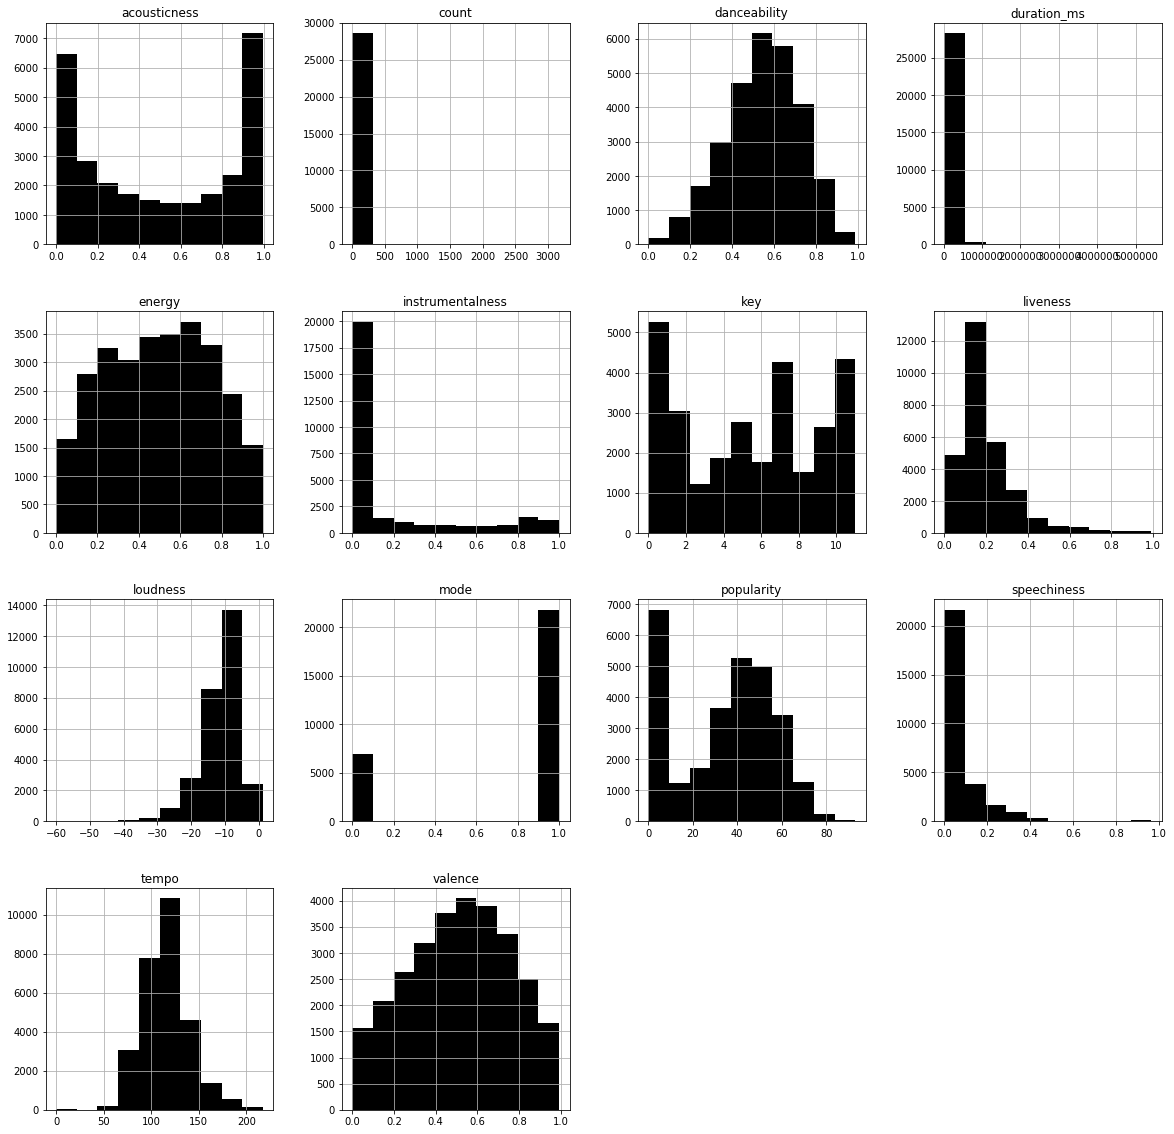

In [17]:
artist_songs.hist(figsize = (20,20), color = 'black')
plt.show()

The data is distributed similarly to the all songs dataset with the exception of Acousticness.  When sliced by genre or artist, Acousticness is now highly distributed at the max and minimum values

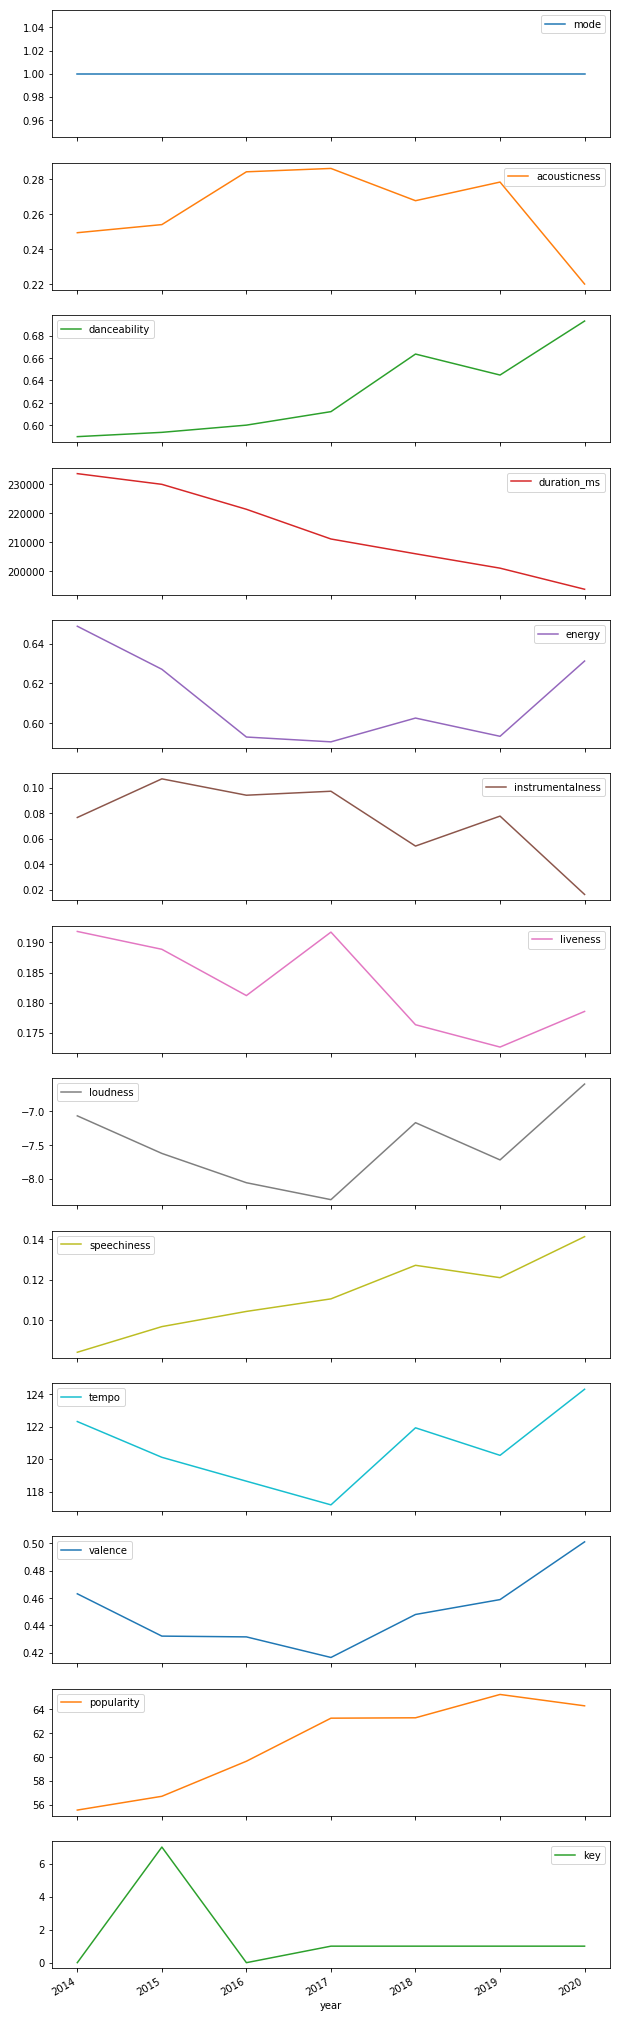

In [18]:
yearly_songs.plot(x = 'year', figsize = (10,40), subplots = True)
plt.show()

Acousticness, Duration Liveness and Instrumentalness are decreasing over time and the other variables are increasing over time

# Interactions


In [19]:
#Displaying correlations for variables in the dataframe
all_songs.corr()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,top_100
valence,1.000000,0.056181,-0.158582,0.402884,-0.153477,0.358152,-0.017231,-0.251433,-0.015967,0.368918,-0.019825,0.040537,0.089599,0.106255,0.010213
year,0.056181,1.000000,-0.014201,0.200258,-0.226406,-0.038085,0.184553,-0.088595,-0.037447,0.033271,-0.043117,0.212880,0.153632,0.022213,0.040095
acousticness,-0.158582,-0.014201,1.000000,-0.224924,-0.079699,-0.644331,-0.134308,0.179658,-0.089066,-0.510884,0.072431,0.071848,-0.081600,-0.168264,-0.078124
danceability,0.402884,0.200258,-0.224924,1.000000,-0.119160,0.135912,0.341298,-0.281517,-0.138295,0.354680,-0.084944,0.034076,0.271286,0.059693,0.083903
duration_ms,-0.153477,-0.226406,-0.079699,-0.119160,1.000000,0.089287,-0.099341,0.084427,0.015155,0.080432,-0.007759,-0.255084,-0.110801,0.038244,-0.026145
energy,0.358152,-0.038085,-0.644331,0.135912,0.089287,1.000000,0.005614,-0.188142,0.156546,0.673628,-0.069136,-0.110988,0.033316,0.202751,0.036066
explicit,-0.017231,0.184553,-0.134308,0.341298,-0.099341,0.005614,1.000000,-0.202438,0.007131,0.095721,-0.113395,0.158173,0.438276,0.057724,0.072520
instrumentalness,-0.251433,-0.088595,0.179658,-0.281517,0.084427,-0.188142,-0.202438,1.000000,0.075593,-0.539721,0.014850,-0.283240,-0.125592,-0.119170,-0.100844
liveness,-0.015967,-0.037447,-0.089066,-0.138295,0.015155,0.156546,0.007131,0.075593,1.000000,-0.002109,-0.017443,-0.046066,0.063764,-0.021780,-0.022411
loudness,0.368918,0.033271,-0.510884,0.354680,0.080432,0.673628,0.095721,-0.539721,-0.002109,1.000000,-0.052762,0.045696,0.030623,0.225406,0.093511


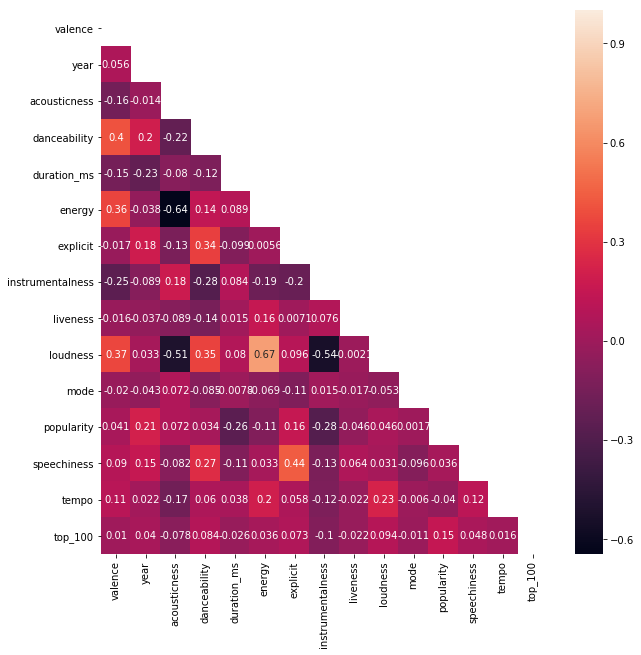

In [20]:
# Create mask for upper triangle
mask = np.triu(np.ones_like(all_songs.corr(), dtype=bool))

# Plot heat map to show correlation
plt.figure(figsize = (10,10))
sns.heatmap(all_songs.corr(), annot = True, mask=mask)

Whether or not a song was in the Top 100 was most strongly correlated with its popularity.

Popularity is most highly correlated with the song's year, instrumentalness and duration.

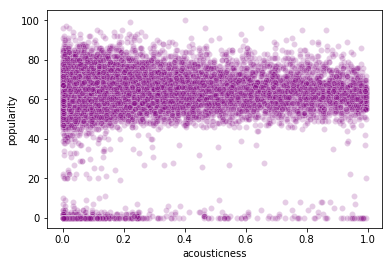

In [66]:
#Creating scatter plots for variables related to popularity
sns.scatterplot(x = 'acousticness', y = 'popularity', data = all_songs, alpha = 0.2, color = 'purple')

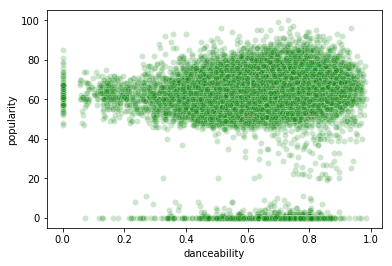

In [61]:
sns.scatterplot(x = 'danceability', y = 'popularity', data = all_songs, alpha = 0.2, color = 'green')

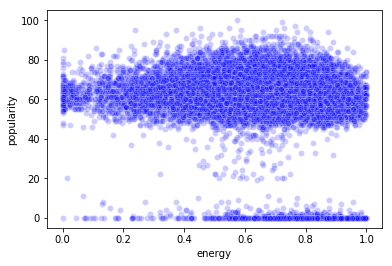

In [62]:
sns.scatterplot(x = 'energy', y = 'popularity', data = all_songs, alpha = 0.2, color = 'blue')

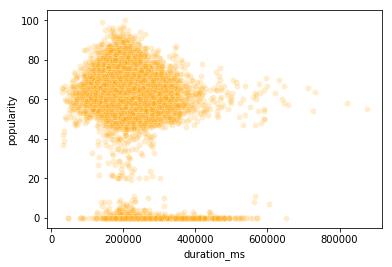

In [52]:
sns.scatterplot(x = 'duration_ms', y = 'popularity', data = all_songs, alpha = 0.2, color = 'orange')

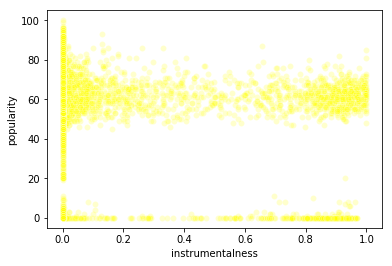

In [53]:
sns.scatterplot(x = 'instrumentalness', y = 'popularity', data = all_songs, alpha = 0.2, color = 'yellow')

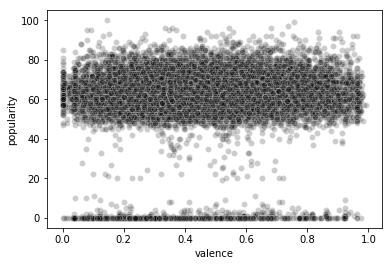

In [54]:
sns.scatterplot(x = 'valence', y = 'popularity', data = all_songs, alpha = 0.2, color = 'black')

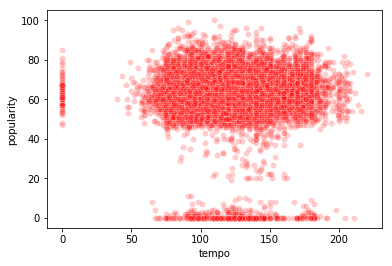

In [55]:
sns.scatterplot(x = 'tempo', y = 'popularity', data = all_songs, alpha = 0.2, color = 'red')

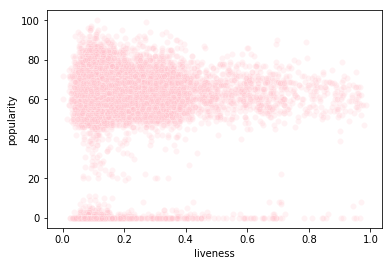

In [56]:
sns.scatterplot(x = 'liveness', y = 'popularity', data = all_songs, alpha = 0.2, color = 'pink')

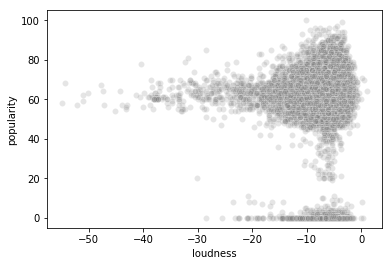

In [57]:
sns.scatterplot(x = 'loudness', y = 'popularity', data = all_songs, alpha = 0.2, color = 'gray')

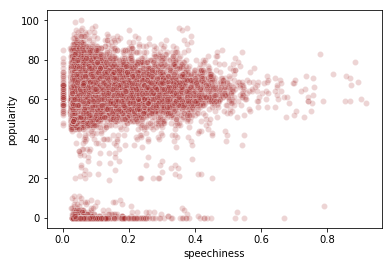

In [58]:
sns.scatterplot(x = 'speechiness', y = 'popularity', data = all_songs, alpha = 0.2, color = 'brown')

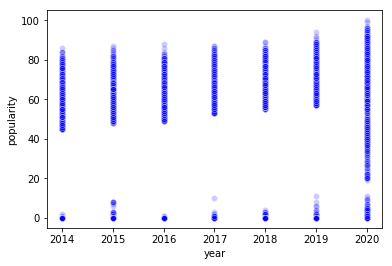

In [59]:
sns.scatterplot(x = 'year', y = 'popularity', data = all_songs, alpha = 0.2, color = 'blue')